# NGC 1275 Limit Plots 
This notebook allows the reproduction of Figs. 7 and 8 from J. H. Matthews et al. 2022, "How do magnetic field models affect astrophysical limits on light axion-like particles? An X-ray case study with NGC 1275".

The data is stored in [alpro/docs/source/data/NGC1275_limits.dat](../data/NGC1275_limits.dat), with column headings as follows:

- ``logm``: $\log_{10} [m_a ({\rm eV})]$, ALP mass
- ``logg_abspl``: 99.7% limit on $\log_{10} [g_{a \gamma} ({\rm GeV}^{-1})]$ for absorbed power-law model 
- ``logg_N``: 99.7% limit on $\log_{10} [g_{a \gamma} ({\rm GeV}^{-1})]$ for model N
- ``logg_r20``: 99.7% limit on $\log_{10} [g_{a \gamma} ({\rm GeV}^{-1})]$ for model B from Reynolds et al. 2020

The data is given at 0.1 dex resolution as this was the resolution of the grid of ALP survival probability curves. 

Note that the plots don't match the format in the paper, but the data is identical. 

In [1]:
%matplotlib inline
import numpy as np
from astropy.io import ascii 
import matplotlib.pyplot as plt 
import alpro
data = ascii.read('../data/NGC1275_limits.dat') 
alpro.util.set_default_plot_params(tex=True)

## Fig 7: Spectral Model Comparison

**Figure caption:**
     
> 99.7 per cent limits obtained in this work using two different approaches for modelling the X-ray spectrum, zoomed in to the $10^{-14}\geq m_a/{\rm eV}< 10^{-11}$ region. The partially covering absorber fits use spectral models of the XSPEC form ``tbabs*tbpcf(ALPs*(pow+zgauss))``, whereas the absorbed power-law models use ``phabs*zphabs(ALPs*pow)``. For comparison, we also show the limits from Reynolds et al. (2020) who used the absorbed power-law method. The limits are not very sensitive to the choice of spectral model, and we reproduce very similar results as Reynolds et al. (2020) when using the equivalent spectral model. 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


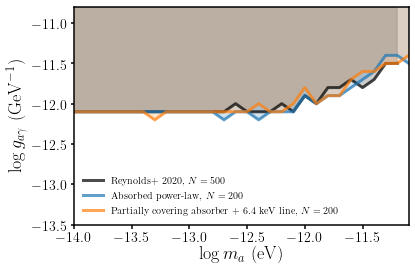

In [2]:
# set up some labels and colours to use to match those in the paper
labels = [r"Reynolds+ 2020, $N=500$", "Absorbed power-law, $N=200$", "Partially covering absorber $+$ $6.4$~keV line, $N=200$"]
mods = ["r20", "abspl", "1"]
colors = ["k", "C0", "C1"]
for i, label in enumerate(labels):
    plt.plot(data["logm"], data["logg_{}".format(mods[i])], c=colors[i], lw=3, ls="-", label=label, alpha=0.7)
    plt.fill_between(data["logm"], data["logg_{}".format(mods[i])], y2=-10.8, alpha=0.2, color=colors[i])

# aesthetics
plt.legend(frameon=False, loc=3)
plt.xlim(-14,-11.1)
plt.ylim(-13.5,-10.8)
plt.ylabel(r"$\log g_{a\gamma}~({\rm GeV}^{-1})$", fontsize=18)
_ = plt.xlabel(r"$\log m_a~({\rm eV})$", fontsize=18)

## Fig 8: B-field Model Comparison

**Figure caption:**
     
> How does the choice of magnetic field model affect the NGC 1275 X-ray limits on light axion-like particles? A comparison of $99.7$ per cent ALP limits obtained using different approaches for modelling the magnetic field. The models used are given in Table 1 and the colours of the lines match those in the table and in Fig. 5. The limits typically vary by 0.1 dex at $m_a<10^{-14}$~eV, with the most pessimistic model (model 3) resulting in weaker constraints on $g_{a \gamma}$ by 0.3 dex. Overall, the limits obtained are not very sensitive to whether a cell-based or GRF approach is used, and the choices made about the coherence length of the magnetic field only change the limits by $0.1$ dex.

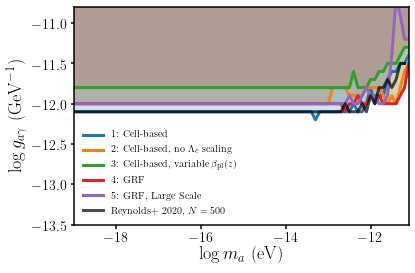

In [4]:
# set up some labels and colours to use to match those in the paper
labels = [
    "Cell-based", 
    r"Cell-based, no $\Lambda_c$ scaling", 
    r"Cell-based, variable $\beta_{\rm pl}(z)$", 
    "GRF", 
    "GRF, Large Scale"
]
colors = ["C0", "C1", "C3", "C2", "C4"]

# cycle over each model and plot the 99.7% excluded region
for i, label in enumerate(labels):
    plt.plot(data["logm"], data["logg_{}".format(i+1)], label="{}: {}".format(i+1, label))
    plt.fill_between(data["logm"], data["logg_{}".format(i+1)], y2=-10.8, alpha=0.2, color=colors[i])

# plot the reynolds limits
plt.plot(data["logm"], data["logg_r20".format(i+1)], c="k", lw=3, ls="-", label=r"Reynolds+ 2020, $N=500$", alpha=0.7)

# aesthetics
plt.legend(frameon=False, loc=3)
plt.xlim(-19,-11.1)
plt.ylim(-13.5,-10.8)
plt.ylabel(r"$\log g_{a\gamma}~({\rm GeV}^{-1})$", fontsize=18)
_ = plt.xlabel(r"$\log m_a~({\rm eV})$", fontsize=18)